<h1><center>Project MAA106: approximation of periodic functions</center></h1>

<h2><center> Authors: Dain Jung & Vrushank Agrawal (Group 3) </centr></h2>

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import integrate

<h2> Section 1: Fourier Series </h2>

<h3>1.1 Background </h3>
Given a 2$\pi$-periodic function f: $\mathbb{R} \rightarrow \mathbb{R}$, its Fourier series S(f) is defined by 

**$$ S(f)(x) = a_0 (f) + 2\sum_{n=1}^{\infty} (a_n(f)cos(nx) + b_n(f)sin(nx)) $$**

where the Fourier coefficients $a_n(f)$ and $b_n(f)$ are given by 

**$$ a_n(f) = \frac{1}{2\pi} \int_{-\pi}^{\pi} f(x)cos(nx) \,dx \\, \\ b_n(f) = \frac{1}{2\pi} \int_{-\pi}^{\pi} f(x)sin(nx) \, dx $$**

<h3> 1.2 Observations </h3>

<h4> 1.2.1 </h4>

The function f and g described in the assignement are both even functions, hence it is straightforward to conclude that $b_n(f) = b_n(g) = 0$, while $$a_n(g) = \frac{1}{\pi} \int_{0}^{\pi} g(x)cos(nx) \,dx \\ a_n(f) = \frac{1}{\pi} \int_{0}^{\pi} f(x)cos(nx) \,dx$$

In [12]:
def f1():
    return 1

def f2():
    return -1

def g(x):
    return 1 - (2*x/math.pi)

def a_n_f(n):
    return integrate.quad(f1() * np.cos(n*x), 0, math.pi/2) + integrate.quad(f2() * np.cos(n*x), math.pi/2, math.pi)

def a_n_g(n):
    return integrate.quad(g(x)*np.cos(n*x), 0, math.pi)

def Sum_f(n, x):
    sum_f = a_n_f(0)
    for i in range(1, n):
        sum += 2*a_n_f(n)*np.cos(n*x)
    return sum_f

def Sum_g(n, x):
    sum_g = a_n_g(0)
    for i in range(1,n):
        sum += 2*a_n_g(n)*np.cos(n*x)
    return sum_g


def Sn_even():
    poly_sum = a_n_f(0)

* Above is a Python code that evaluates the truncated fourier series of an even 2$\pi$-periodic function.

<h4> 1.2.3 </h4>
As suggested, we will study the decay of Fourier coefficients of functions with different regularity, and the error between the functions and their tranccated Fourier series. 

Here, we will study the functions $f_1: x \rightarrow x^2$ , $f_2: x \rightarrow cos(x)$, and $f_3: x \rightarrow {sin(x)}^2$ on the interval $I = [-1,1]$. It is worth noting that $f_1 and f_2$ are even functions while $f_3$ is an odd function. Hence $b_n(f_1) = b_n(f_2) = a_n(f_3) = 0$, while $a_n(f)$ for $f_1$, $f_2$, and $b_n(f)$ for $f_3$ is goven by:

$$a_n(f) = \frac{1}{\pi} \int_{0}^{\pi} f(x)cos(nx) \,dx $$ 
$$b_n(f) = \frac{1}{\pi} \int_{0}^{\pi} f(x)sin(nx) \,dx $$ 

Moreover, the trunacated Fourier series for functions $f_1$, $f_2$,  and $f_3$ is respectively given by the trigonometric polynomial: $$ S_N^{even}(f)(x) = a_0(f) + 2\sum_{n=1}^{N-1} a_n(f)cos(nx) $$

$$ S_N^{odd}(f)(x) = b_0(f) + 2\sum_{n=1}^{N-1} b_n(f)sin(nx) $$

Below, we define the three functions as f1, f2, and f3 respectively and first analyze the decay of their Fourier coefficients.

[ 5.85307167e-18  2.50000000e-01 -4.88610773e-18  6.93889390e-18
 -4.73352864e-18 -4.16333634e-17 -6.12634932e-17 -1.47451495e-17
 -4.66261989e-18 -6.24500451e-17]


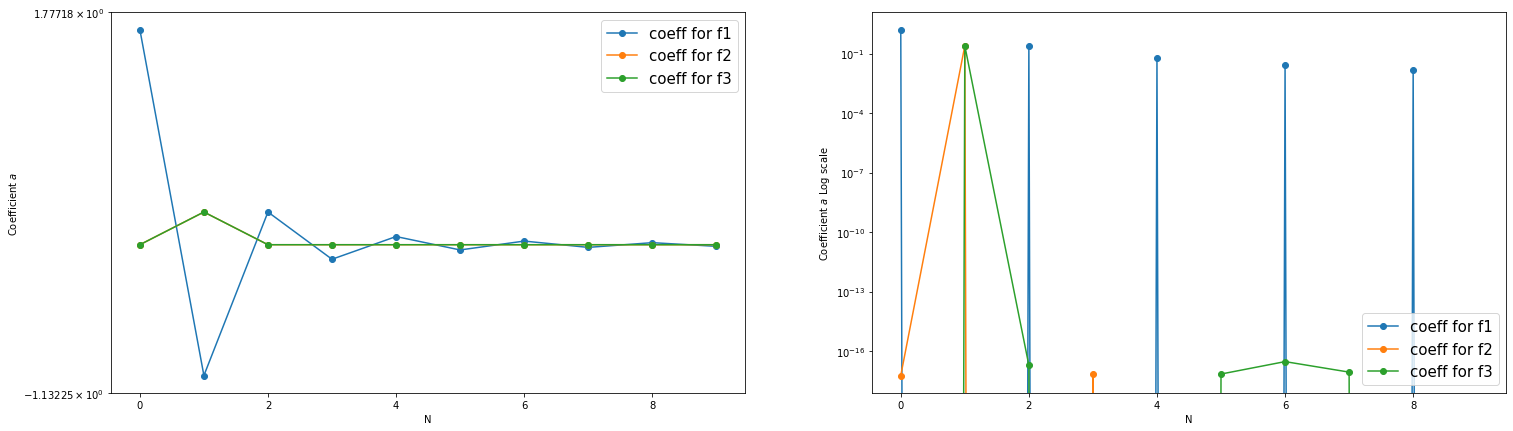

In [19]:
def f1(x):
    return x**2

def f2(x):
    return np.cos(x)

def f3(x):
    return np.sin(x)

def a(f, n):                                                          #calculates a single coefficient
    func = lambda x : f(x) * np.cos(n * x)
    return integrate.quad(func, 0, math.pi)

def b(f, n):                                                          #calculates a single coefficient
    func = lambda x : f(x) * np.sin(n * x)
    return integrate.quad(func, 0, math.pi)

def Fourier_coeff_even(f):                                                   #calculates fourier coefficients upto N
    coeff, err = np.zeros(10), np.zeros(10)
    for i in range(10):
        coeff[i], err[i] = a(f, i)
    return coeff / (2*math.pi), err

def Fourier_coeff_odd(f):                                                   #calculates fourier coefficients upto N
    coeff, err = np.zeros(10), np.zeros(10)
    for i in range(10):
        coeff[i], err[i] = b(f, i)
    return coeff / (2*math.pi), err

tabk = np.arange(0,10,1)
coeff_f1, err_f1 = Fourier_coeff_even(f1)
coeff_f2, err_f2 = Fourier_coeff_even(f2)
coeff_f3, err_f3 = Fourier_coeff_odd(f3)

print(coeff_f2)

plt.figure(figsize=(25, 7))
plt.subplot(1,2,1)
plt.plot(tabk, coeff_f1, marker='o', label='coeff for f1')
plt.plot(tabk, coeff_f2, marker='o', label='coeff for f2')
plt.plot(tabk, coeff_f3, marker='o', label='coeff for f3')
plt.xlabel('N')
plt.yscale('symlog')
plt.ylabel('Coefficient $a$')
plt.legend(fontsize=15)
plt.subplot(1,2,2)
plt.plot(tabk, coeff_f1, marker='o', label='coeff for f1')
plt.plot(tabk, coeff_f2, marker='o', label='coeff for f2')
plt.plot(tabk, coeff_f3, marker='o', label='coeff for f3')
plt.xlabel('N')
plt.yscale('log')
plt.ylabel('Coefficient $a$ Log scale')
plt.legend(fontsize=15)
plt.show()

In the functions above, we have calculated the Fourier coefficients from $a_0$ to $a_9$, and as we can observe, the coefficients decay to zero extremely fast for the functions f2 and f3 because they are of the class $C^{\infty}$, commpared to the function f1 which is of the class $C^2$. This observation is also consistent with the remark that smoother the function is, faster is the decay of its Fourier coefficients.

Now, let us study the error between the function and its truncated Fourier series in the next cell.

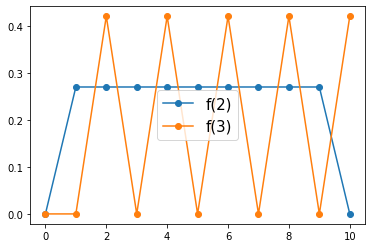

In [29]:
def Sn_even(f, x):
    partial_sum = np.zeros(11)
    partial_sum[0] = a(f, 0)[0]
    for i in range(1, 10, 1):
        partial_sum[i] = partial_sum[i-1] + 2 * a(f, i)[0] * np.cos(i * x)
    return partial_sum / (2 * math.pi)

def Sn_odd(f, x):
    partial_sum = np.zeros(11)
    partial_sum[0] = 0
    for i in range(1, 10, 1):
        partial_sum[i+1] = partial_sum[i-1] + 2 * b(f, i)[0] * np.sin(i * x)
    return partial_sum / (2 * math.pi)

partial_sum_f2 = Sn_even(f2, 1)
partial_sum_f3 = Sn_odd(f3, 1)

tabk = np.arange(0, len(partial_sum_f2))

plt.plot( tabk, partial_sum_f2, marker='o', label='f(2)')
plt.plot( tabk, partial_sum_f3, marker='o', label='f(3)')
plt.legend(fontsize=15)